In [51]:
#importación de librerias
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
df = pd.read_excel('data/HombresNum.xlsx')

In [53]:
df.head()

,Attrition,Age,Education,JobLevel,JobSatisfaction,NumCompaniesWorked,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,No,49,1,2,2,1,3,10,7,1,7
1,Yes,37,2,1,3,6,3,0,0,0,0
2,No,27,1,1,2,9,3,2,2,2,2
3,No,32,2,1,4,0,2,7,7,3,6
4,No,30,1,1,3,1,2,1,0,0,0


In [54]:
df.describe()

,Age,Education,JobLevel,JobSatisfaction,NumCompaniesWorked,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000
mean,36.653061,2.899093,2.028345,2.758503,2.613379,2.758503,6.859410,4.106576,2.116780,4.034014
std,9.042329,1.035148,1.113477,1.106970,2.470521,1.269373,6.205575,3.519361,3.188546,3.517587
min,18.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,1.000000,2.000000,1.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,35.000000,3.000000,2.000000,3.000000,1.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,42.000000,4.000000,3.000000,4.000000,4.000000,3.000000,9.000000,7.000000,2.000000,7.000000
max,60.000000,5.000000,5.000000,4.000000,9.000000,6.000000,37.000000,18.000000,15.000000,17.000000


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 882 entries, 0 to 881
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Attrition                882 non-null    object
 1   Age                      882 non-null    int64 
 2   Education                882 non-null    int64 
 3   JobLevel                 882 non-null    int64 
 4   JobSatisfaction          882 non-null    int64 
 5   NumCompaniesWorked       882 non-null    int64 
 6   TrainingTimesLastYear    882 non-null    int64 
 7   YearsAtCompany           882 non-null    int64 
 8   YearsInCurrentRole       882 non-null    int64 
 9   YearsSinceLastPromotion  882 non-null    int64 
 10  YearsWithCurrManager     882 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 75.9+ KB


In [23]:
df.isnull().sum()

Attrition                  0
Age                        0
Education                  0
JobLevel                   0
JobSatisfaction            0
NumCompaniesWorked         0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsInCurrentRole         0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

In [56]:
#Preprocesamiento 
df['Attrition'] = df['Attrition'].map({'Yes':1,'No':0})

In [71]:
df.sample(10)

,Attrition,Age,Education,JobLevel,JobSatisfaction,NumCompaniesWorked,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
150,0,29,3,1,4,1,1,6,5,1,5
293,0,43,4,4,4,4,3,1,0,0,0
102,0,32,5,1,3,3,2,5,4,1,4
439,0,38,4,2,4,8,1,1,0,0,0
283,0,26,2,2,2,1,5,5,3,1,4
99,0,57,2,3,4,3,2,5,3,1,4
632,1,29,4,1,1,6,2,9,7,0,7
524,0,25,4,2,4,0,4,4,3,1,1
184,0,51,3,2,2,5,3,4,1,1,2
697,0,36,2,2,1,6,3,5,4,0,4


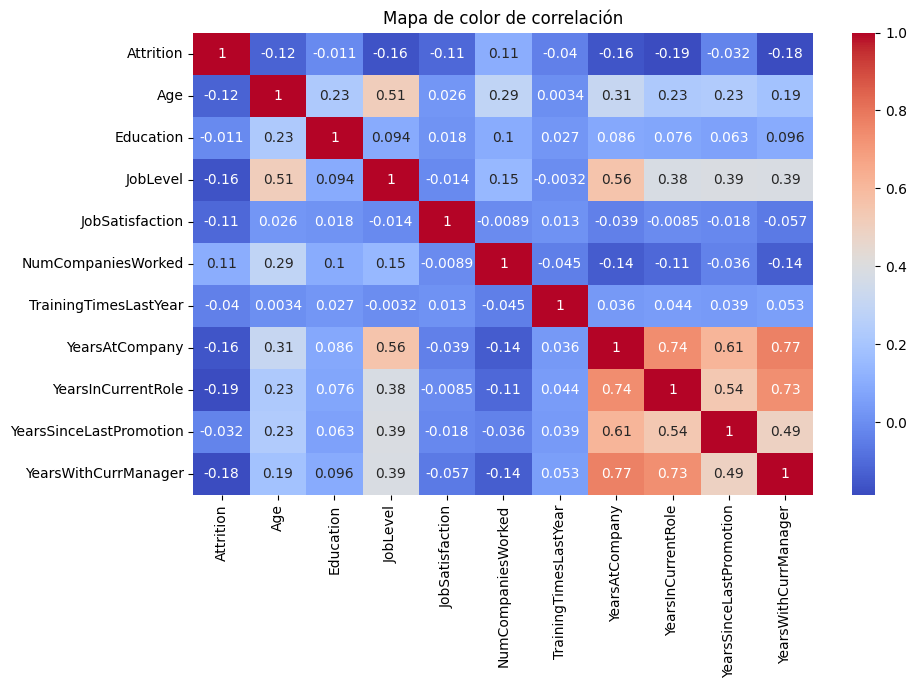

In [26]:
#Gráfica_01 Heatmap de correlación
plt.figure(figsize = (10,6))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')
plt.title('Mapa de color de correlación')
plt.show()

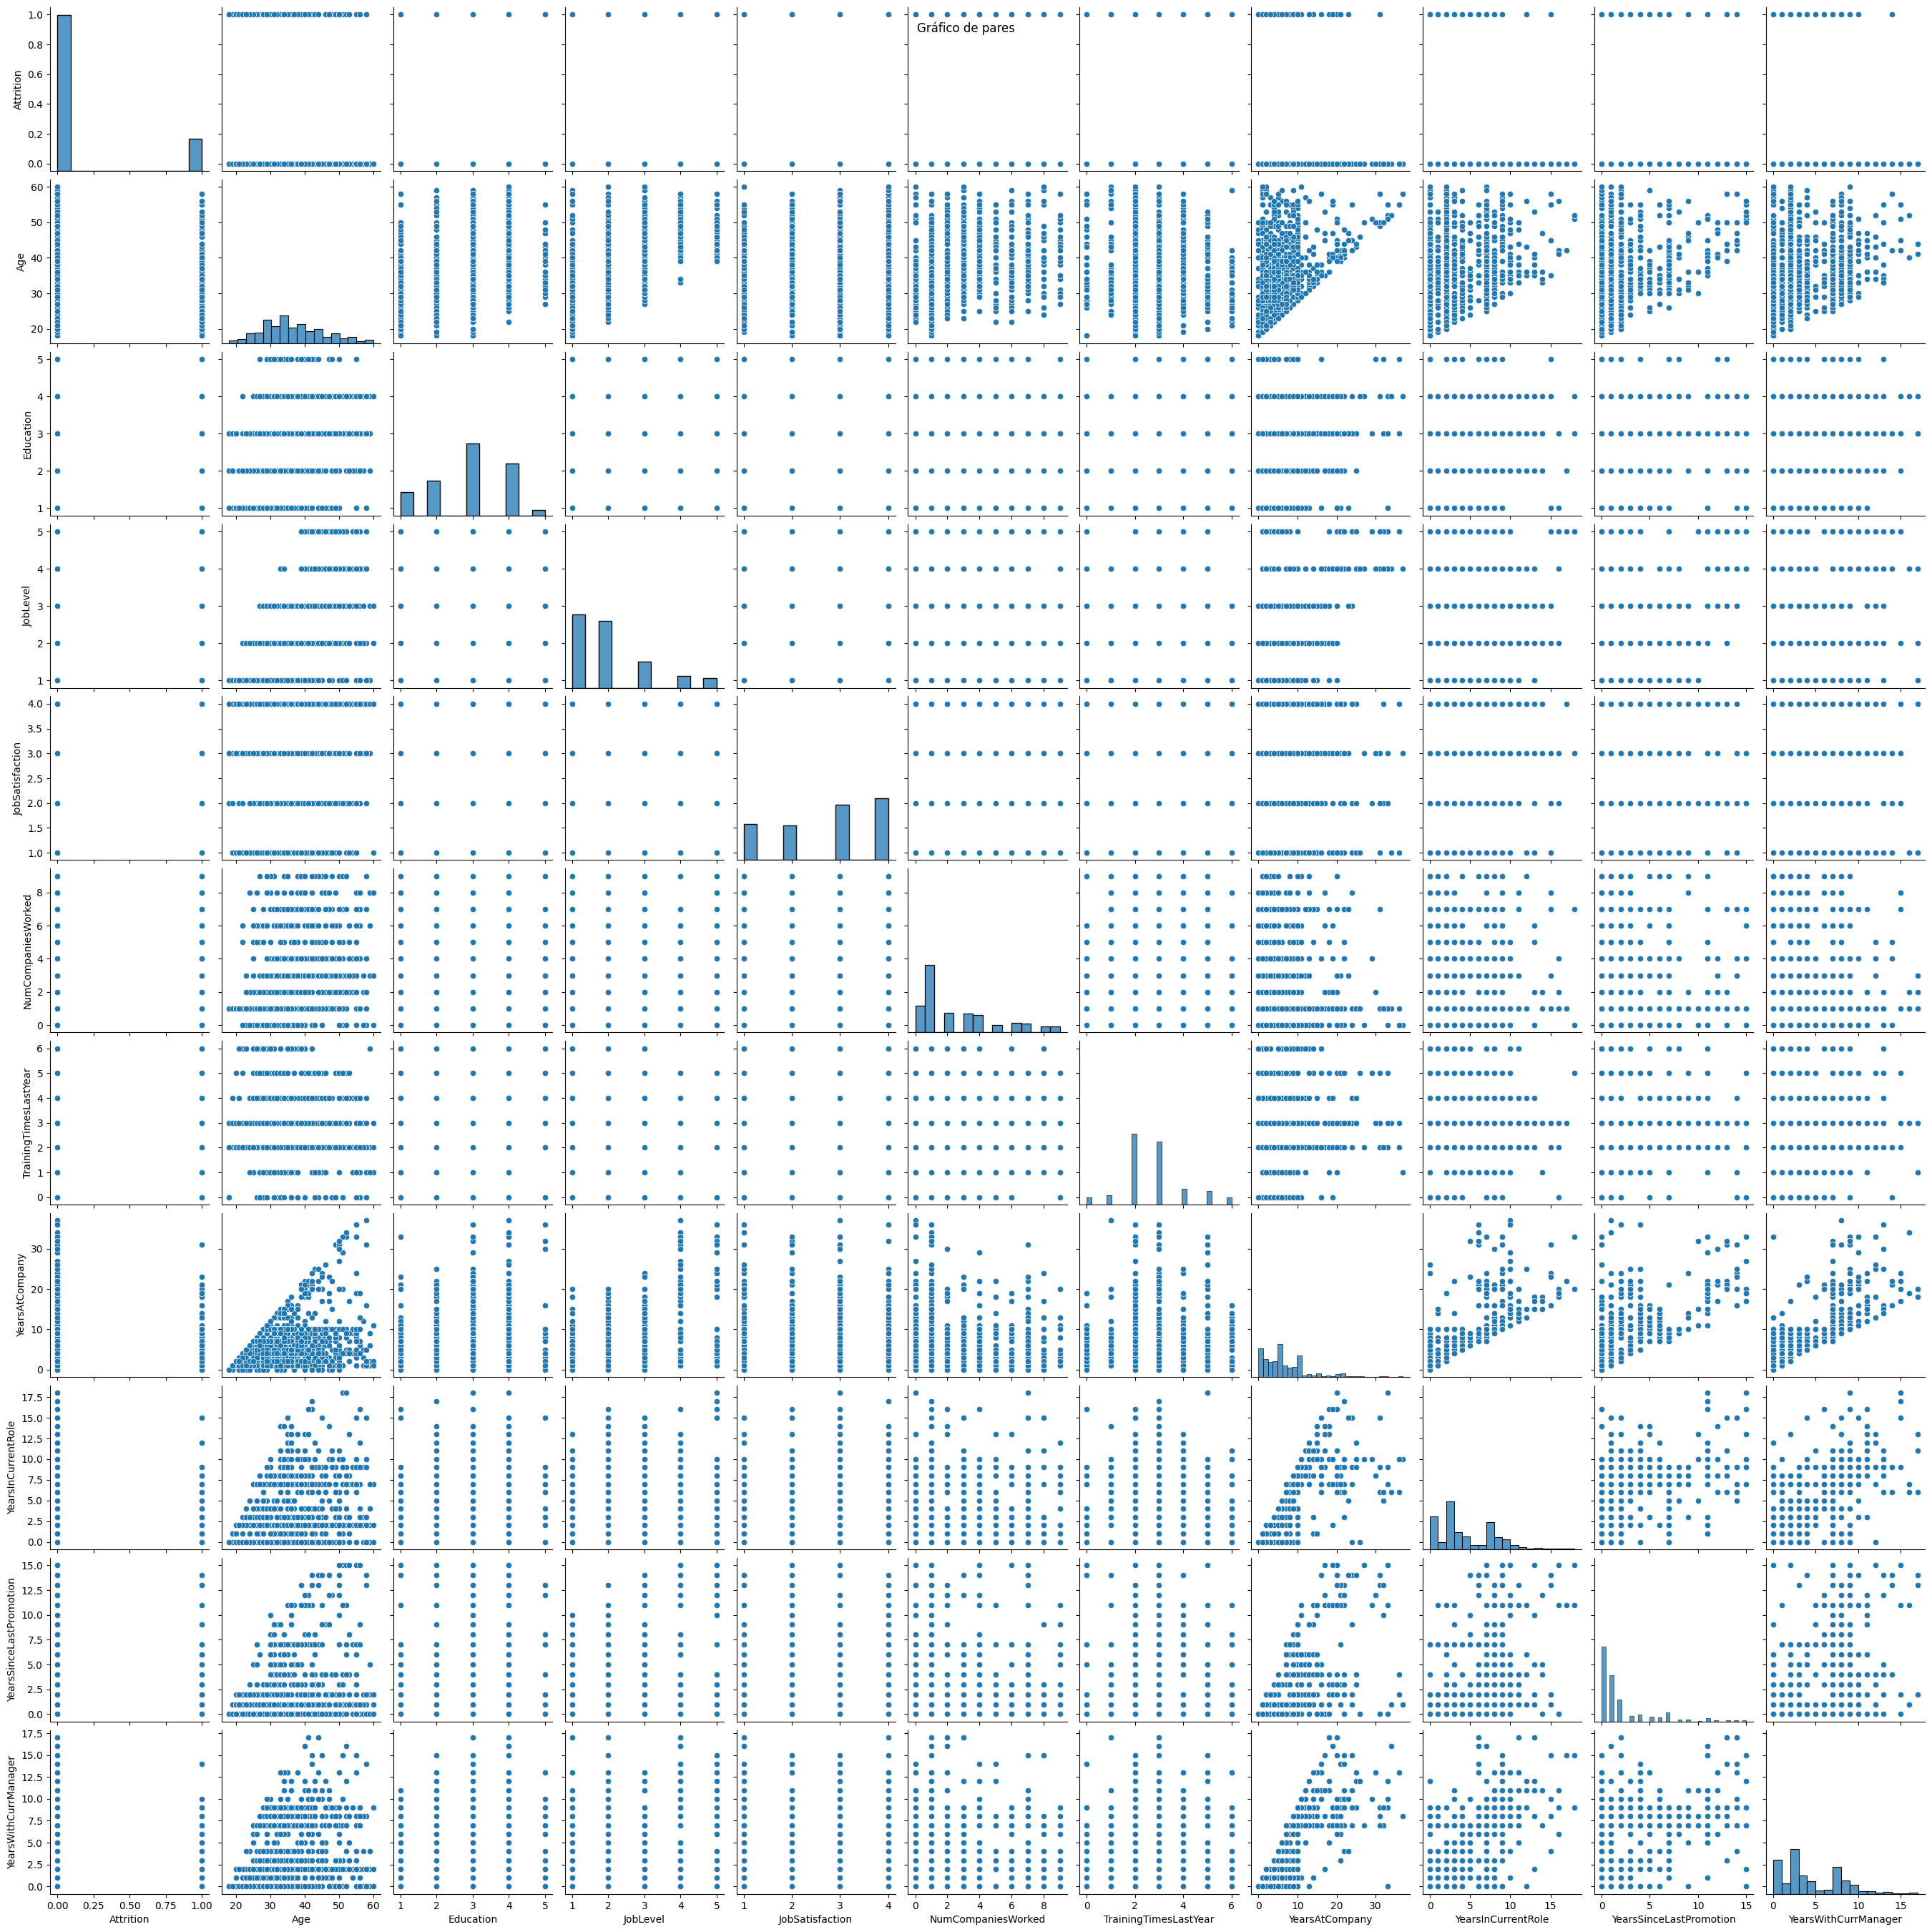

In [27]:
sns.pairplot(df)
plt.suptitle('Gráfico de pares')
plt.show()

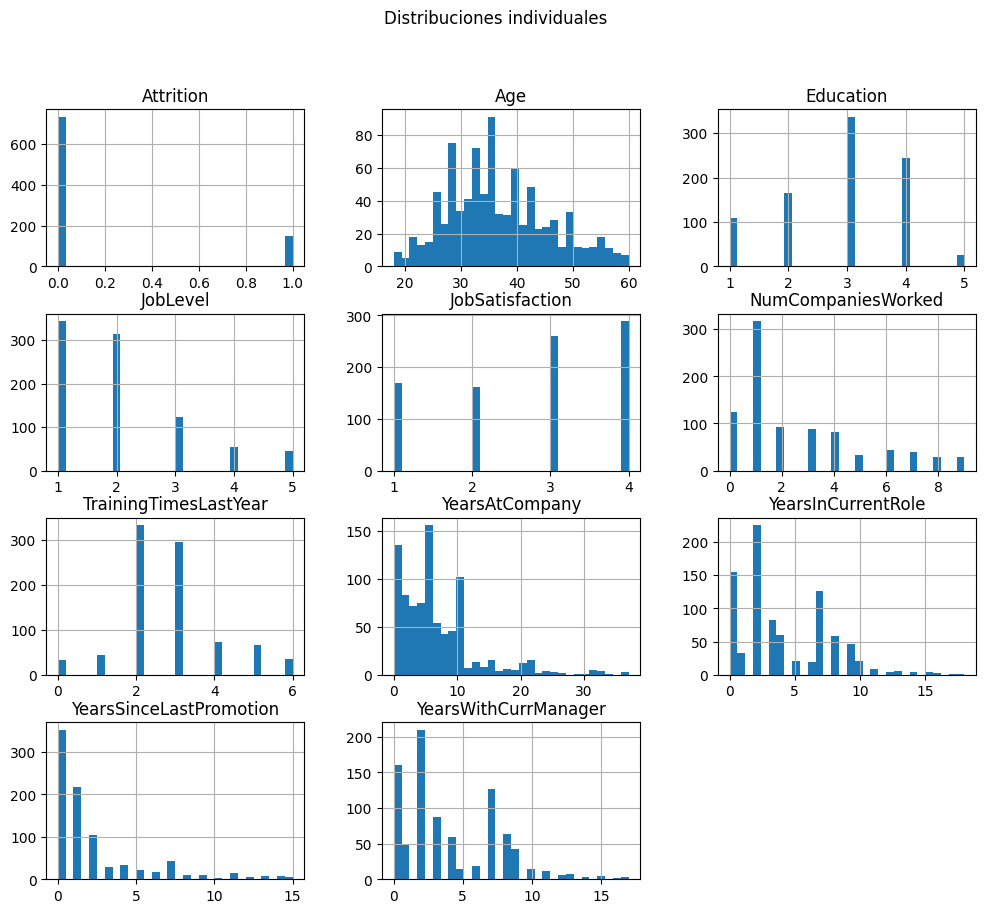

In [28]:
#Gráfica_03 Histograma múltiple
df.hist(bins = 30, figsize = (12,10))
plt.suptitle('Distribuciones individuales')
plt.show()

In [72]:
#Estandarización
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df_scaled = scaler.fit_transform(df)

In [73]:
#PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

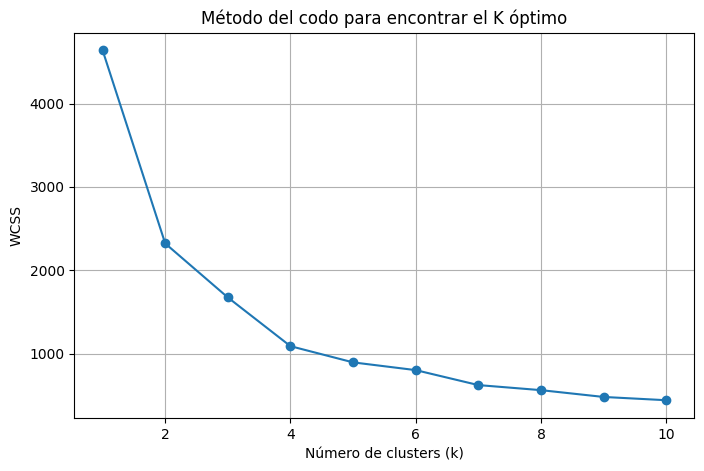

In [80]:
#Kmedias
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

wcss = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k,n_init = 'auto', random_state=42)
    kmeans.fit(df_pca)  
    wcss.append(kmeans.inertia_)  

# Gráfico del codo
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o')
plt.title('Método del codo para encontrar el K óptimo')
plt.xlabel('Número de clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

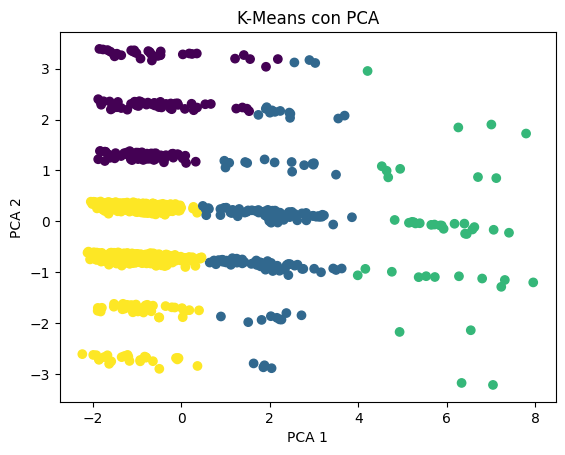

Silhouette Score K-Means: 0.5078750488244692


In [81]:
kmeans = KMeans(n_clusters=4,n_init = 'auto' , random_state=42)
labels_kmeans = kmeans.fit_predict(df_pca)

# Visualizar
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=labels_kmeans, cmap='viridis')
plt.title("K-Means con PCA")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

# Silhouette
sil_kmeans = silhouette_score(df_pca, labels_kmeans)
print("Silhouette Score K-Means:", sil_kmeans)

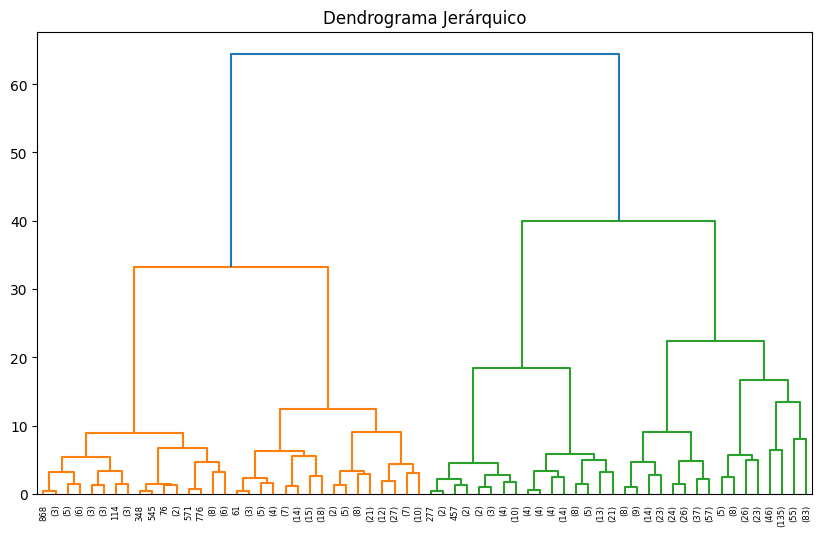

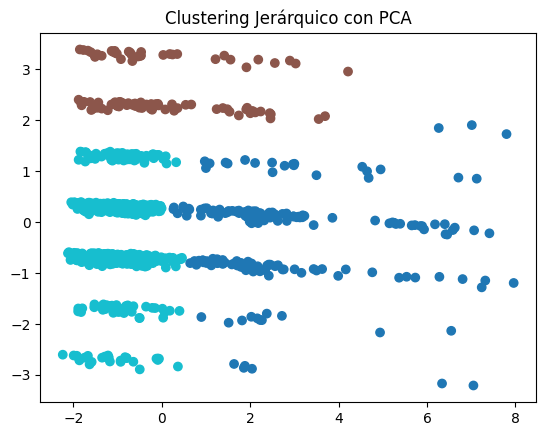

Silhouette Score Jerárquico: 0.5077908554276617


In [76]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

linkage_matrix = linkage(df_pca, method='ward')

# Dendrograma
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, truncate_mode='level', p=5)
plt.title("Dendrograma Jerárquico")
plt.show()

# Agrupar 
labels_hier = fcluster(linkage_matrix, t=3, criterion='maxclust')

# Visualizar clusters
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=labels_hier, cmap='tab10')
plt.title("Clustering Jerárquico con PCA")
plt.show()

# Silhouette
sil_hier = silhouette_score(df_pca, labels_hier)
print("Silhouette Score Jerárquico:", sil_hier)

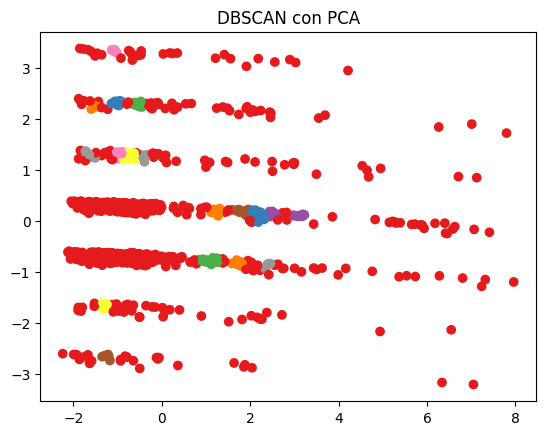

Silhouette Score DBSCAN: 0.48593636170243876


In [77]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.1, min_samples=5)
labels_dbscan = dbscan.fit_predict(df_pca)

# Visualizar
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=labels_dbscan, cmap='Set1')
plt.title("DBSCAN con PCA")
plt.show()

# Silhouette 
valid = labels_dbscan != -1
if valid.sum() > 0:
    sil_dbscan = silhouette_score(df_pca[valid], labels_dbscan[valid])
    print("Silhouette Score DBSCAN:", sil_dbscan)
else:
    print("DBSCAN no detectó clusters válidos.")

In [78]:
print("Silhouette Score DBSCAN:", sil_dbscan)
print("Silhouette Score Jerárquico:", sil_hier)
print("Silhouette Score K-Means:", sil_kmeans)

Silhouette Score DBSCAN: 0.48593636170243876
Silhouette Score Jerárquico: 0.5077908554276617
Silhouette Score K-Means: 0.5078750488244692
